#### Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
np.random.seed(10) #set random seed for repeatability of results
x = np.random.uniform(0,1,30) # generate 30 uniformly distributed x
sigma = 0.07 #given sigma
e = np.random.normal(0,sigma,30) #given random variable normally distributed
y = np.sin(2*np.pi*x)**2 # square of sin(2pix)
g = y + e #g sigma of x


x1 = np.arange(0,1.01,0.01) # this will be used to plot the function
y1 = np.sin(2*np.pi*x1)**2 # this will be used to plot the function

#### Required plot

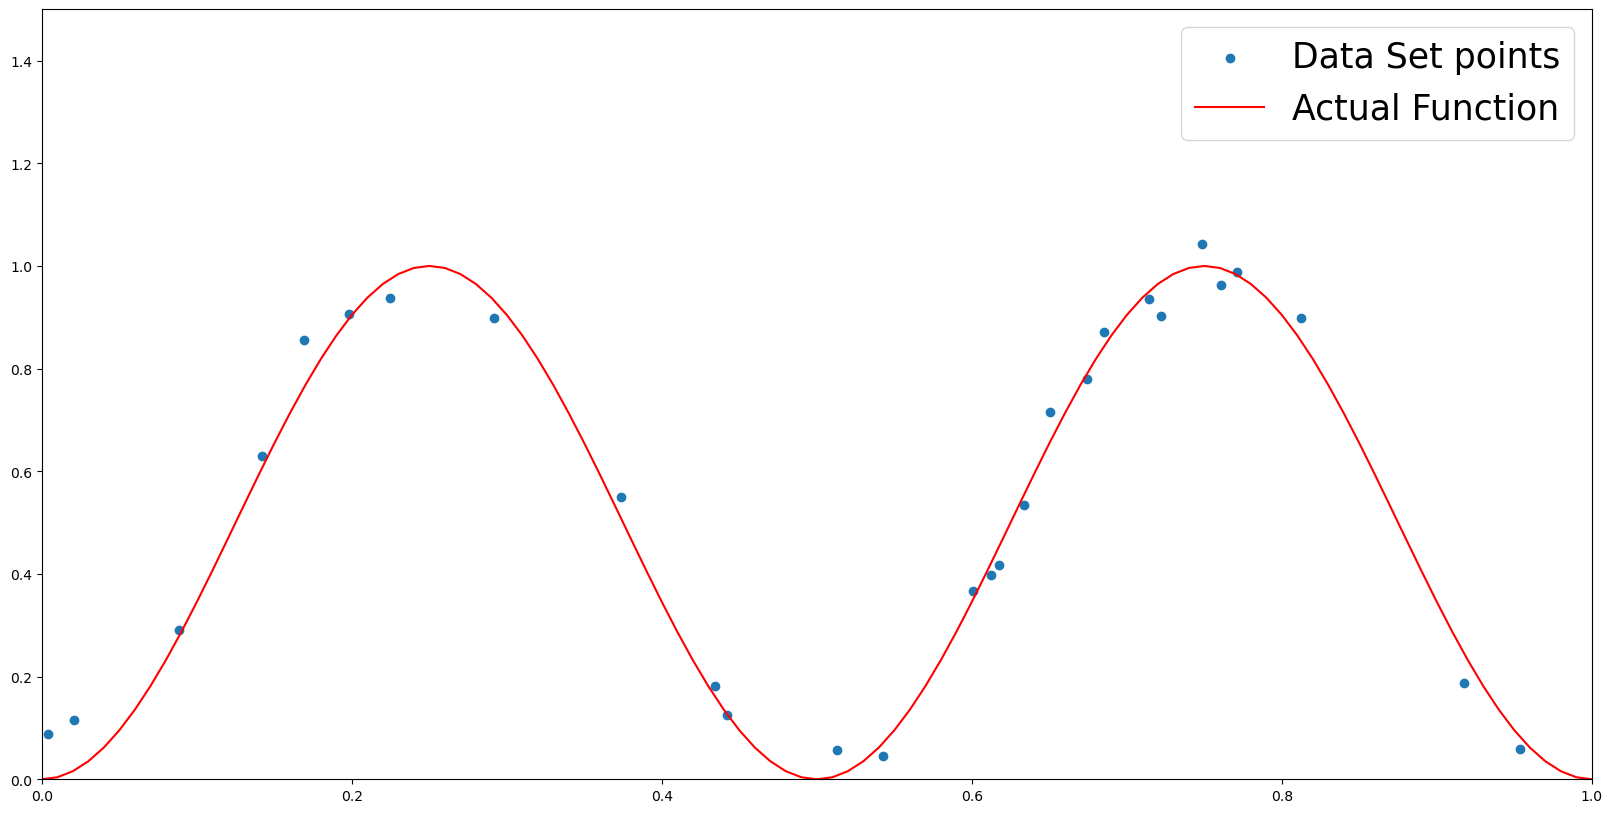

In [25]:
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(xmin=0,xmax=1) # set x limits from 0 to 1
ax.set_ylim(ymin=0,ymax=1.5) # set y limits from 0 to 1.5

plt.scatter(x,g) # scatter plot
plt.plot(x1,y1,color='r')  # scatter plot
ax.legend(['Data Set points','Actual Function'],fontsize=25)

plt.show()
f.savefig("figure2i.png") # save as png

In [26]:
df = pd.DataFrame() #create an empty dataframe
col_names = ['x_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form x_1 , x_2 and so on
for ind,col in enumerate(col_names): # iterate through the index , column name of list create above
    df[col] = x ** (ind) # calculate basis function which is x power 1, x power 2 and so on and add it to dataframe created above
df['g']=g # add a column to dataframe created above

In [27]:
def weight_calc_sin(k,dataframe,dependent): # function which will calculate weights of required model
    z=list(range(k)) #create list which will be used below to run through columns 
    X = np.array(dataframe.iloc[:,z ].values) # create X array which will contain independent variable
    Y = np.array(dataframe.loc[:, dependent].values) # create Y array which will contain independent variable
    weight = np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)) , np.matmul(X.transpose() , Y)) # calculation of weight
    return list(np.round(weight,2)) #output weights to 2 decimal places

In [28]:
weights=[] #empty list which will store all weights
for i in range(1,19): # iterate through all 19 columns generated above
    weights.append(weight_calc_sin(i,df,'g')) # find weights for each basis function

In [29]:
col_names = ['y_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form y_1 , y_2 and so on
for i,j in enumerate(col_names): # iterate through the index , column name of list create above
    z=list(range(i+1))   #create list which will be used below to run through columns 
    X=df.iloc[:,z] # select columns based on basis function
    df[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() ) # predict y corresponding to basis function

In [30]:
x_new = np.array(list(np.arange(0,1.01,0.01))) # new x's for further prediction of unseen data
x_col_names = ['x_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form x_1 , x_2 and so on
df_calc = pd.DataFrame()  #create an empty dataframe
y_col_names = ['y_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form y_1 , y_2 and so on
for ind,col in enumerate(x_col_names):  # iterate through the index , column name 
    df_calc[col] = x_new ** (ind) #calculate x to various powers

In [31]:
for i,j in enumerate(y_col_names): # iterate through the index , column name
    z=list(range(i+1)) 
    X=df_calc.iloc[:,z]
    df_calc[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() ) # predict y based on weights calculated

#### Required Plot for Q2b

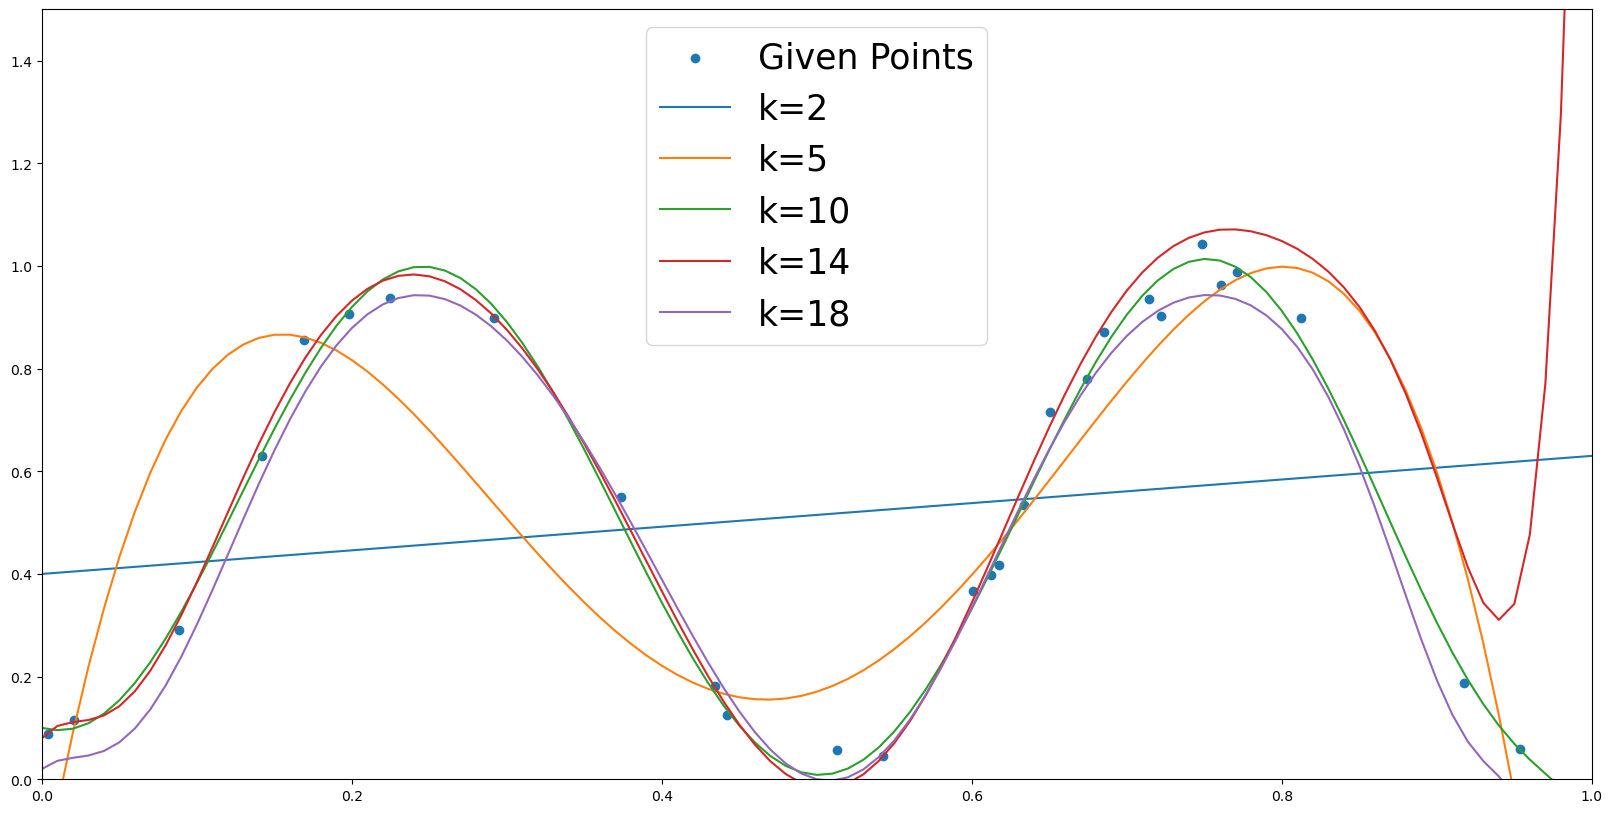

In [32]:
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(xmin=0,xmax=1)
ax.set_ylim(ymin=0,ymax=1.5)
plt.scatter(x,g)
plt.plot(df_calc['x_2'],df_calc['y_2'])

plt.plot(df_calc['x_2'],df_calc['y_5'])

plt.plot(df_calc['x_2'],df_calc['y_10'])
plt.plot(df_calc['x_2'],df_calc['y_14'])

plt.plot(df_calc['x_2'],df_calc['y_18'])


ax.legend(['Given Points','k=2','k=5','k=10','k=14','k=18'],fontsize=25)
plt.show()
f.savefig("figure2ii.png") # save as png


#### Log Train error plot for 1 run


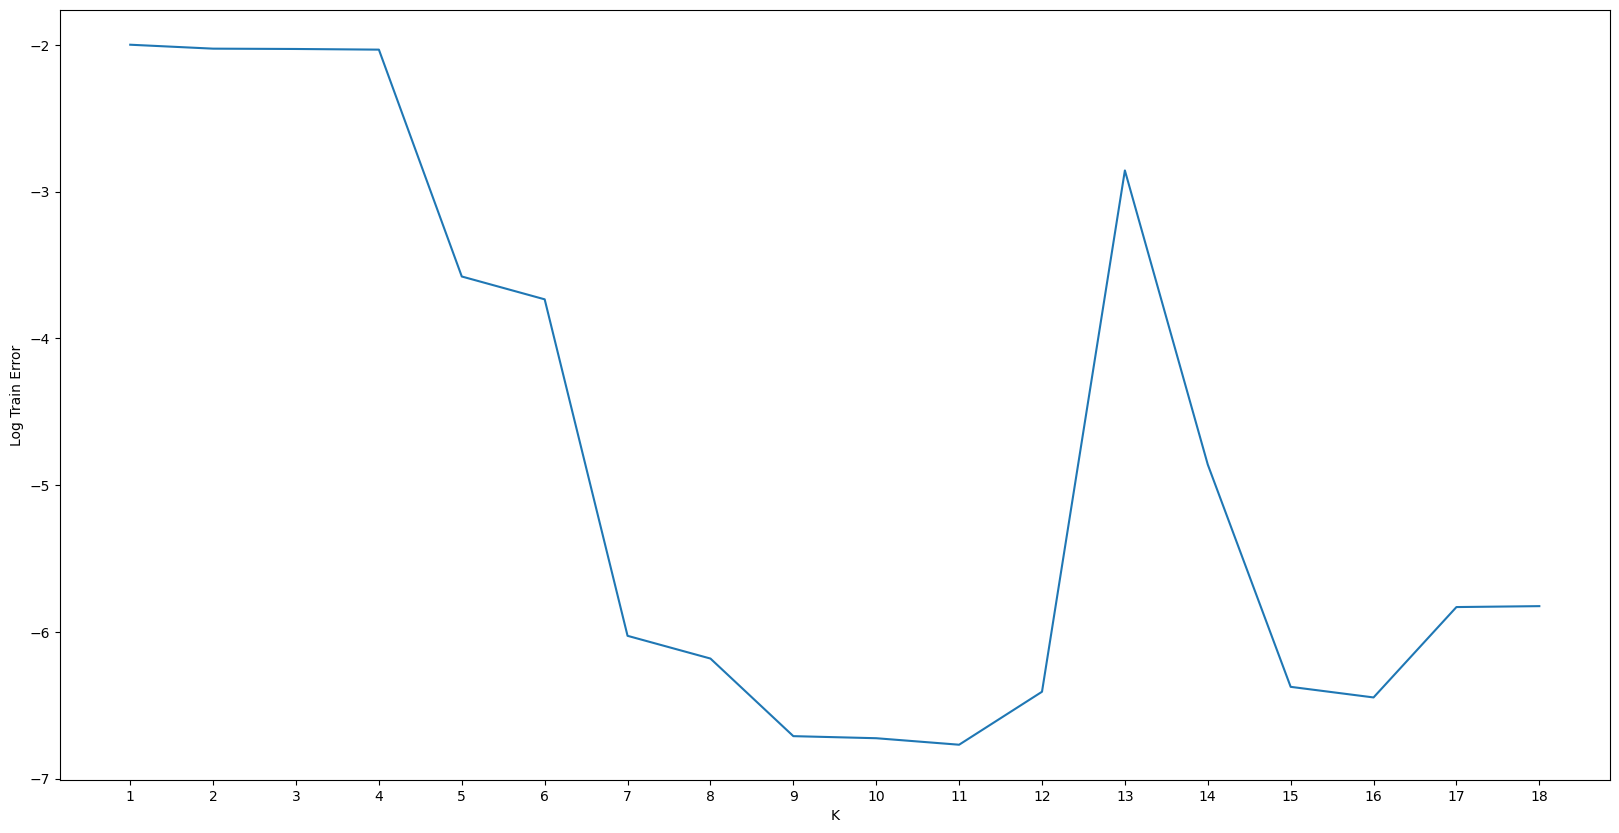

In [11]:
mse_train = []
k = list(range(1,19))
for num in k:
    mse_train.append(np.mean((df['g']-df['y_'+ str(num)])**2))


plt.show()
f, ax = plt.subplots(figsize=(20, 10))

plt.plot(k,np.log(mse_train))
plt.xticks(k)    
plt.xlabel('K')
plt.ylabel('Log Train Error')
plt.show()
f.savefig("figure2ii.png")

In [12]:
np.random.seed(10) #random seed for reproducibility of results

x = np.random.uniform(0,1,1000) # generate 1000 uniformly distributed x
sigma = 0.07 #given sigma
e = np.random.normal(0,sigma,1000) # given e
y = np.sin(2*np.pi*x)**2 #given y
g = y + e #given g

In [13]:
df_test = pd.DataFrame()  #create an empty dataframe
col_names = ['x_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form x_1 , x_2 and so on
for ind,col in enumerate(col_names): # iterate through the index , column name of list create above
    df_test[col] = x ** (ind) # calculate basis function which is x power 1, x power 2 and so on and add it to dataframe created above
df_test['g']=g # add a column to dataframe created above


In [14]:
col_names = ['y_'+ str(i) for i in range(1,19)] #create list of strings which will be used as column names of form y_1 , y_2 and so on
for i,j in enumerate(col_names): # iterate through the index , column name of list create above
    z=list(range(i+1)) #create list which will be used below to run through columns 
    X=df_test.iloc[:,z] # select columns based on basis function
    df_test[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() ) # predict y corresponding to basis function

#### Test Error Calculation and plot

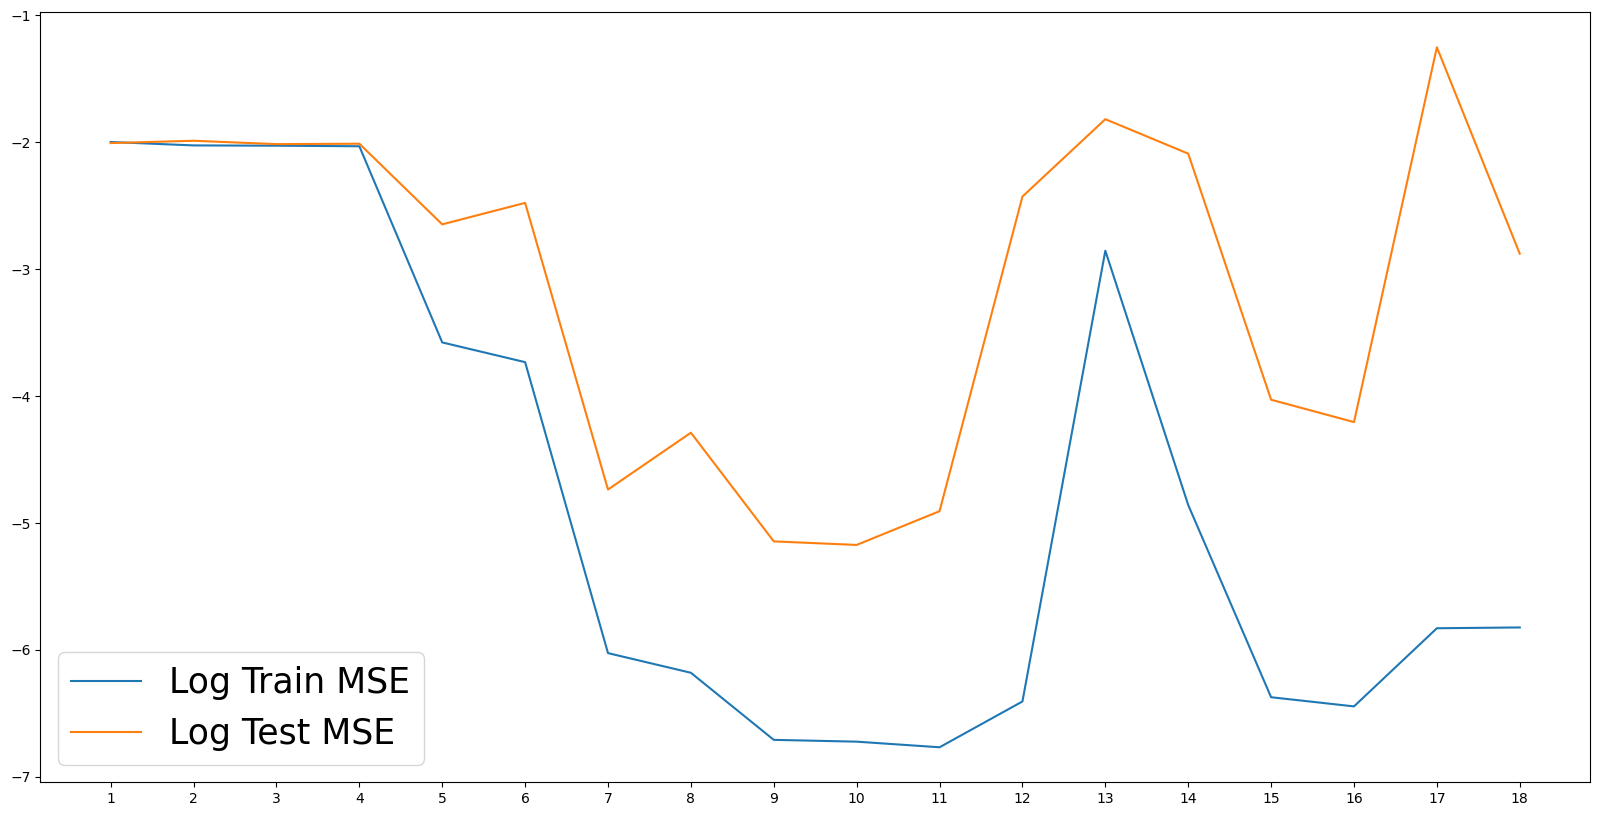

In [15]:
mse_test = []
k = list(range(1,19))
for num in k:
    mse_test.append(np.mean((df_test['g']-df_test['y_'+ str(num)])**2))
ind = list(range(1,19))
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(ind)  
  
plt.plot(ind,np.log(mse_train))

plt.plot(ind,np.log(mse_test))
ax.legend(['Log Train MSE','Log Test MSE'],fontsize=25)

plt.show()
f.savefig("figure2iii.png") # save as png

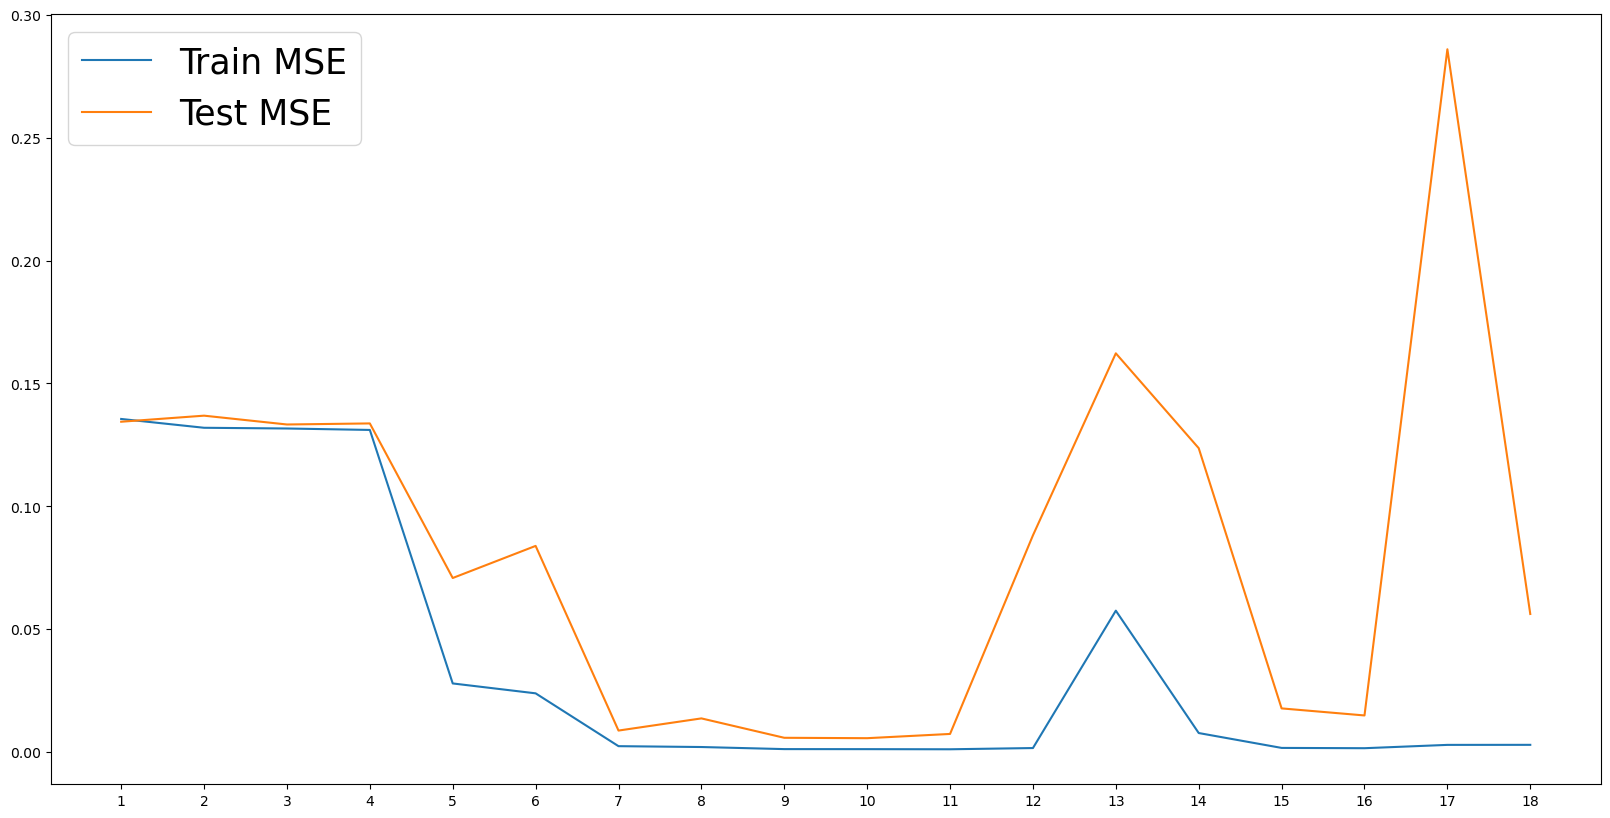

In [16]:
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(ind)  
plt.plot(ind,mse_train)

plt.plot(ind,mse_test)
ax.legend(['Train MSE','Test MSE'],fontsize=25)
plt.show()

#### Part D

In [17]:
#### same method as explained above but it is run 100 times and log of average MSE for train and test sets is calculated
np.random.seed(10)

mse_train = []
mse_test = []
for itr in range(100):
    x = np.random.uniform(0,1,30)
    sigma = 0.07
    e = np.random.normal(0,sigma,30)
    y = np.sin(2*np.pi*x)**2 
    g = y + e
    df = pd.DataFrame()
    col_names = ['x_'+ str(i) for i in range(1,19)]
    for ind,col in enumerate(col_names):
        df[col] = x ** (ind) 
    df['g']=g
    weights=[]
    for i in range(1,19):
        weights.append(weight_calc_sin(i,df,'g'))
    col_names = ['y_'+ str(i) for i in range(1,19)]
    for i,j in enumerate(col_names):
        z=list(range(i+1)) 
        X=df.iloc[:,z]
        df[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() )
    k = list(range(1,19))
    for num in k:
        mse_train.append((itr,num,np.mean((df['g']-df['y_'+ str(num)])**2)))
    
    x = np.random.uniform(0,1,1000)
    sigma = 0.07
    e = np.random.normal(0,sigma,1000)
    y = np.sin(2*np.pi*x)**2 
    g = y + e
    df_test = pd.DataFrame()
    col_names = ['x_'+ str(i) for i in range(1,19)]
    for ind,col in enumerate(col_names):
        df_test[col] = x ** (ind) 
    df_test['g']=g
    col_names = ['y_'+ str(i) for i in range(1,19)]
    for i,j in enumerate(col_names):
        z=list(range(i+1)) 
        X=df_test.iloc[:,z]
        df_test[j]= np.matmul(np.array(X),np.array([weights[i]]).transpose() )
    k = list(range(1,19))
    for num in k:
        mse_test.append((itr,num,np.mean((df_test['g']-df_test['y_'+ str(num)])**2)))

In [18]:
train_error=pd.DataFrame(mse_train,columns=['itr','k','MSE']) # data frame for train MSE

In [19]:
final = train_error.groupby('k')['MSE'].mean().to_frame().reset_index()
final['log_mean']=np.log(final['MSE']) # calculating log of mean

In [20]:
test_error=pd.DataFrame(mse_test,columns=['itr','k','MSE']) # data frame for test MSE
final_test = test_error.groupby('k')['MSE'].mean().to_frame().reset_index()
final_test['log_mean']=np.log(final_test['MSE']) # calculating log of mean

#### Required Plot for D

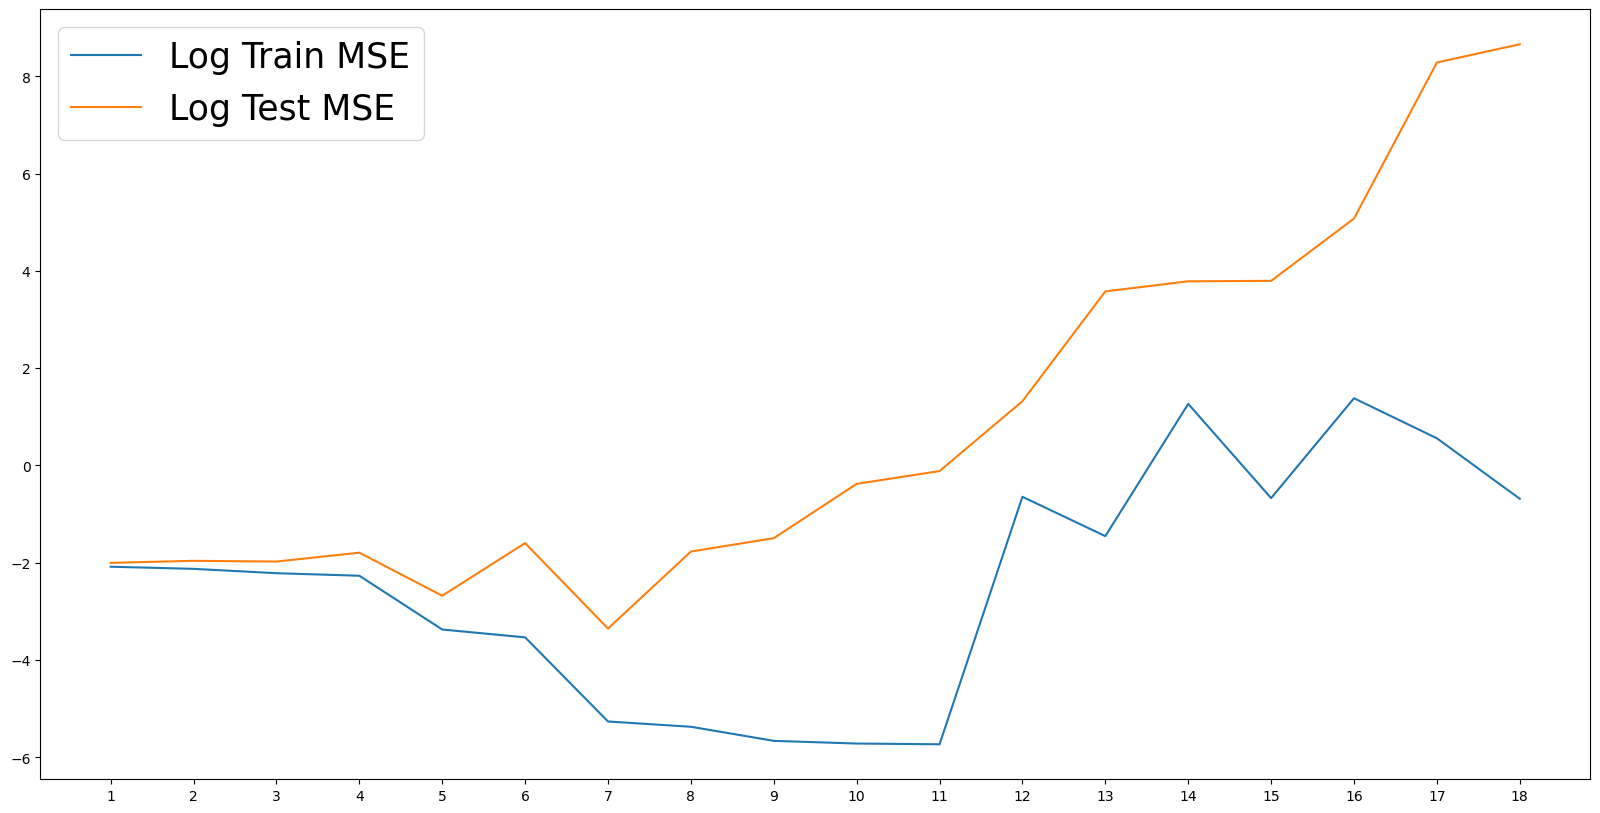

In [21]:
f, ax = plt.subplots(figsize=(20, 10))

plt.plot(final['k'],final['log_mean'])
plt.plot(final_test['k'],final_test['log_mean'])
ax.legend(['Log Train MSE','Log Test MSE'],fontsize=25)
ind = list(range(1,19))
plt.xticks(ind)  


plt.show()
f.savefig("figure2iiii.png") # save as png